# Time series analysis for icecream purchasing forecast

In [9]:
# Data Wrangling

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# dataframe display function
from IPython.display import display

# matplotlib Japanese support
import japanize_matplotlib

# pandas float display adjustment
pd.options.display.float_format = '{:.4f}'.format

# show all columns of dataframe
pd.set_option('display.max_columns', None)

## original data

アイスクリーム調査報告書(by 一般社団法人アイスクリーム協会)
https://www.icecream.or.jp/biz/data/expenditures.html

EXCEL file below was made based on the report's contents

In [3]:
# data import
url2 = 'https://github.com/makaishi2/sample-data/blob/master/data/ice-sales.xlsx?raw=true'

df = pd.read_excel(url2, sheet_name=0)

In [4]:
# data verification
display(df.head())
display(df.tail())

,年月,支出
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


,年月,支出
55,2019-08-01,1513
56,2019-09-01,996
57,2019-10-01,724
58,2019-11-01,531
59,2019-12-01,584


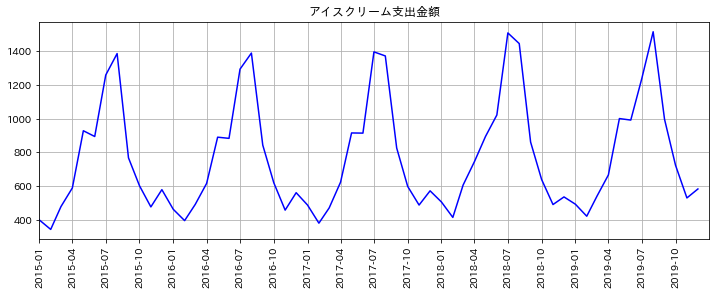

In [8]:
# plot the time-series graph (expenditure for icecream)
fig, ax = plt.subplots(figsize = (12, 4))

# graph plot
ax.plot(df['年月'], df['支出'], c = 'b')

# graph memory for 3-month periods
month3 = mdates.MonthLocator(interval = 3)
ax.xaxis.set_major_locator(month3)

# rotation
ax.tick_params(axis = 'x', rotation = 90)

# start date and end date
sday = pd.to_datetime('2015-1-1')
eday = pd.to_datetime('2019-12-31')
ax.set_xlim(sday, eday)

# graph paper
ax.grid()
ax.set_title('アイスクリーム支出金額')

# plot
plt.show()

### data pre-processing

In [10]:
# data frame for prophet
x = df.copy()
x.columns = ['ds', 'y']
display(x.head())

,ds,y
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


In [18]:
# data split
# set reference date as train data and test data
mday = pd.to_datetime('2019-1-1')

# index for both train and test data
train_index = x['ds'] < mday
test_index = x['ds'] >= mday

# input data split
x_train = x[train_index]
x_test = x[test_index]

# split data string
dates_train = x['ds'][train_index]
dates_test = x['ds'][test_index]


### algorithm selection and learning

In [13]:
# library
from fbprophet import Prophet
m = Prophet(yearly_seasonality = 5, weekly_seasonality = False, daily_seasonality = False)

In [15]:
# learning
m = m.fit(x_train)


Initial log joint probability = -28.035
Iteration  1. Log joint probability =    30.8842. Improved by 58.9192.
Iteration  2. Log joint probability =    73.3443. Improved by 42.4601.
Iteration  3. Log joint probability =    103.653. Improved by 30.3083.
Iteration  4. Log joint probability =    137.548. Improved by 33.8958.
Iteration  5. Log joint probability =    153.766. Improved by 16.2175.
Iteration  6. Log joint probability =    155.013. Improved by 1.2472.
Iteration  7. Log joint probability =    155.322. Improved by 0.309118.
Iteration  8. Log joint probability =    155.383. Improved by 0.0610988.
Iteration  9. Log joint probability =    155.392. Improved by 0.00880654.
Iteration 10. Log joint probability =    155.411. Improved by 0.0185315.
Iteration 11. Log joint probability =    155.421. Improved by 0.0106114.
Iteration 12. Log joint probability =    155.426. Improved by 0.00496486.
Iteration 13. Log joint probability =    155.428. Improved by 0.0014576.
Iteration 14. Log join

### prediction

In [16]:
# prediction
future = x[['ds']]
fcst = m.predict(future)

### evaluation

In [17]:
# evaluation

# extract predicted part from fcst
ypred = fcst[-12:]['yhat'].values

# correct data list
ytest = x_test['y'].values

# R^2 calculation
from sklearn.metrics import r2_score
score = r2_score(ytest, ypred)
score_text = f'R2 score:{score:.4f}'
print(score_text)

R2 score:0.9566


### graph plot

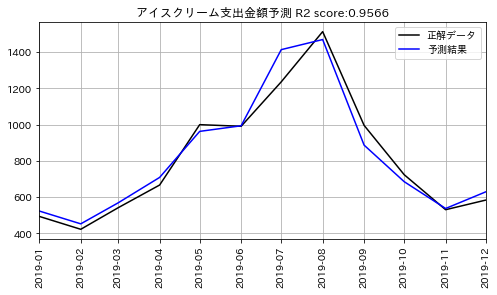

In [20]:
# timeseries graph (expenditure for icecream)
fig, ax = plt.subplots(figsize = (8, 4))

# graph plot
ax.plot(dates_test, ytest, label = '正解データ', c = 'k')
ax.plot(dates_test, ypred, label = '予測結果', c = 'b')

# set graph scale interval as 1 month
month = mdates.MonthLocator()
ax.xaxis.set_major_locator(month)

# rotation
ax.tick_params(axis = 'x', rotation = 90)

# start-date and end-date
sday = pd.to_datetime('2019-1-1')
eday = pd.to_datetime('2019-12-1')
ax.set_xlim(sday, eday)

# graph paper
ax.grid()
ax.legend()
ax.set_title('アイスクリーム支出金額予測 ' + score_text)

# plot show
plt.show()